# Projet 9 - Produisez une étude de marché avec Python 

# Clusterings effectués ainsi que les différentes visualisations associées

## 1 - Importation des librairies

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn import datasets
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import KMeans
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from scipy.spatial.distance import pdist, squareform
import plotly.figure_factory as ff
import plotly.graph_objects as go
import plotly.subplots as sp
from plotly.subplots import make_subplots
from sklearn.preprocessing import MinMaxScaler
from itertools import cycle
from matplotlib.cm import ScalarMappable

## 2 - Importation des tables

In [2]:
data = pd.read_csv('data.csv')
pcs = pd.read_csv('pcs.csv')

In [3]:
data

pays  dispo_alim_(kg/personne/an)  \
0              afghanistan                         1.53   
1           afrique du sud                        35.69   
2                  albanie                        16.36   
3                  algérie                         6.38   
4                allemagne                        19.47   
..                     ...                          ...   
167    émirats arabes unis                        43.47   
168               équateur                        19.31   
169  états-unis d'amérique                        55.68   
170               éthiopie                         0.13   
171           îles salomon                         4.45   

     dispo_interieur*1000t  exportations*1000t  importations*1000t  \
0                     57.0                 0.0                29.0   
1                   2118.0                63.0               514.0   
2                     47.0                 0.0                38.0   
3                    277.0                 0.0                 2.0   
4                   1739.0               646.0               842.0   
..                     ...                 ...                 ...   
167                  412.0                94.0               433.0   
168                  341.0                 0.0                 0.0   
169                18266.0              3692.0               123.0   
170                   14.0                 0.0                 1.0   
171                    3.0                 0.0                 6.0   

     production*1000t  variation_stock*1000t   population  
0                28.0                    0.0   36296113.0  
1              1667.0                   -0.0   57009756.0  
2                13.0                    4.0    2884169.0  
3               275.0                    0.0   41389189.0  
4              1514.0                  -29.0   82658409.0  
..                ...                    ...          ...  
167              48.0                  -26.0    9487203.0  
168             340.0                   -1.0   16785361.0  
169           21914.0                   80.0  325084756.0  
170              14.0                    0.0  106399924.0  
171               0.0                    3.0     636039.0  

[172 rows x 8 columns]

In [4]:
pcs

Unnamed: 0  dispo_alim_(kg/personne/an)  dispo_interieur*1000t  \
0         F1                     0.146256               0.546898   
1         F2                     0.423901              -0.090755   
2         F3                    -0.686277               0.034526   
3         F4                    -0.350076               0.012040   
4         F5                    -0.445605              -0.064161   
5         F6                     0.082605              -0.510858   
6         F7                     0.000003               0.652868   

   exportations*1000t  importations*1000t  production*1000t  \
0            0.440147            0.196354          0.549370   
1            0.053432            0.542580         -0.091823   
2           -0.304269            0.336226         -0.038753   
3            0.404367           -0.552779          0.142386   
4            0.451794            0.495209         -0.022412   
5            0.569501           -0.009939         -0.340887   
6            0.137382           -0.055757         -0.742482   

   variation_stock*1000t  population  
0               0.059700    0.376637  
1               0.623477   -0.343029  
2               0.412732    0.387757  
3               0.511963   -0.354747  
4              -0.411539   -0.422022  
5               0.073437    0.534951  
6               0.022410   -0.000035

## 3 - Ajuster les dataframes

### 3.1 - Réindexer les dataframes

#### 3.1.1 - Dataframe data

In [5]:
data.set_index("pays", inplace=True)
data

dispo_alim_(kg/personne/an)  dispo_interieur*1000t  \
pays                                                                        
afghanistan                                   1.53                   57.0   
afrique du sud                               35.69                 2118.0   
albanie                                      16.36                   47.0   
algérie                                       6.38                  277.0   
allemagne                                    19.47                 1739.0   
...                                            ...                    ...   
émirats arabes unis                          43.47                  412.0   
équateur                                     19.31                  341.0   
états-unis d'amérique                        55.68                18266.0   
éthiopie                                      0.13                   14.0   
îles salomon                                  4.45                    3.0   

                       exportations*1000t  importations*1000t  \
pays                                                            
afghanistan                           0.0                29.0   
afrique du sud                       63.0               514.0   
albanie                               0.0                38.0   
algérie                               0.0                 2.0   
allemagne                           646.0               842.0   
...                                   ...                 ...   
émirats arabes unis                  94.0               433.0   
équateur                              0.0                 0.0   
états-unis d'amérique              3692.0               123.0   
éthiopie                              0.0                 1.0   
îles salomon                          0.0                 6.0   

                       production*1000t  variation_stock*1000t   population  
pays                                                                         
afghanistan                        28.0                    0.0   36296113.0  
afrique du sud                   1667.0                   -0.0   57009756.0  
albanie                            13.0                    4.0    2884169.0  
algérie                           275.0                    0.0   41389189.0  
allemagne                        1514.0                  -29.0   82658409.0  
...                                 ...                    ...          ...  
émirats arabes unis                48.0                  -26.0    9487203.0  
équateur                          340.0                   -1.0   16785361.0  
états-unis d'amérique           21914.0                   80.0  325084756.0  
éthiopie                           14.0                    0.0  106399924.0  
îles salomon                        0.0                    3.0     636039.0  

[172 rows x 7 columns]

#### 3.1.2 - Dataframe pcs

In [6]:
# Supprimer les composantes F5 et F6 et F7
pcs.drop([4, 5, 6], inplace=True)

In [7]:
n_components = 4

In [8]:
x_list = range(1, n_components+1)
list(x_list)

[1, 2, 3, 4]

In [9]:
pcs.index = [f"F{i}" for i in x_list]
pcs

Unnamed: 0  dispo_alim_(kg/personne/an)  dispo_interieur*1000t  \
F1         F1                     0.146256               0.546898   
F2         F2                     0.423901              -0.090755   
F3         F3                    -0.686277               0.034526   
F4         F4                    -0.350076               0.012040   

    exportations*1000t  importations*1000t  production*1000t  \
F1            0.440147            0.196354          0.549370   
F2            0.053432            0.542580         -0.091823   
F3           -0.304269            0.336226         -0.038753   
F4            0.404367           -0.552779          0.142386   

    variation_stock*1000t  population  
F1               0.059700    0.376637  
F2               0.623477   -0.343029  
F3               0.412732    0.387757  
F4               0.511963   -0.354747

In [10]:
pcs = pcs.drop('Unnamed: 0', axis=1)
pcs

dispo_alim_(kg/personne/an)  dispo_interieur*1000t  exportations*1000t  \
F1                     0.146256               0.546898            0.440147   
F2                     0.423901              -0.090755            0.053432   
F3                    -0.686277               0.034526           -0.304269   
F4                    -0.350076               0.012040            0.404367   

    importations*1000t  production*1000t  variation_stock*1000t  population  
F1            0.196354          0.549370               0.059700    0.376637  
F2            0.542580         -0.091823               0.623477   -0.343029  
F3            0.336226         -0.038753               0.412732    0.387757  
F4           -0.552779          0.142386               0.511963   -0.354747

## 4 - Classification ascendante hiérarchique 

### 4.1 - Calculer les distances en utilisant la méthode de Ward et scaler les données

In [11]:
scaler = StandardScaler()

In [12]:
data_scaled = scaler.fit_transform(data)

In [13]:
Z = linkage(data_scaled, method="ward", metric = "euclidean")

### 4.2 - Réalisation dendrogramme

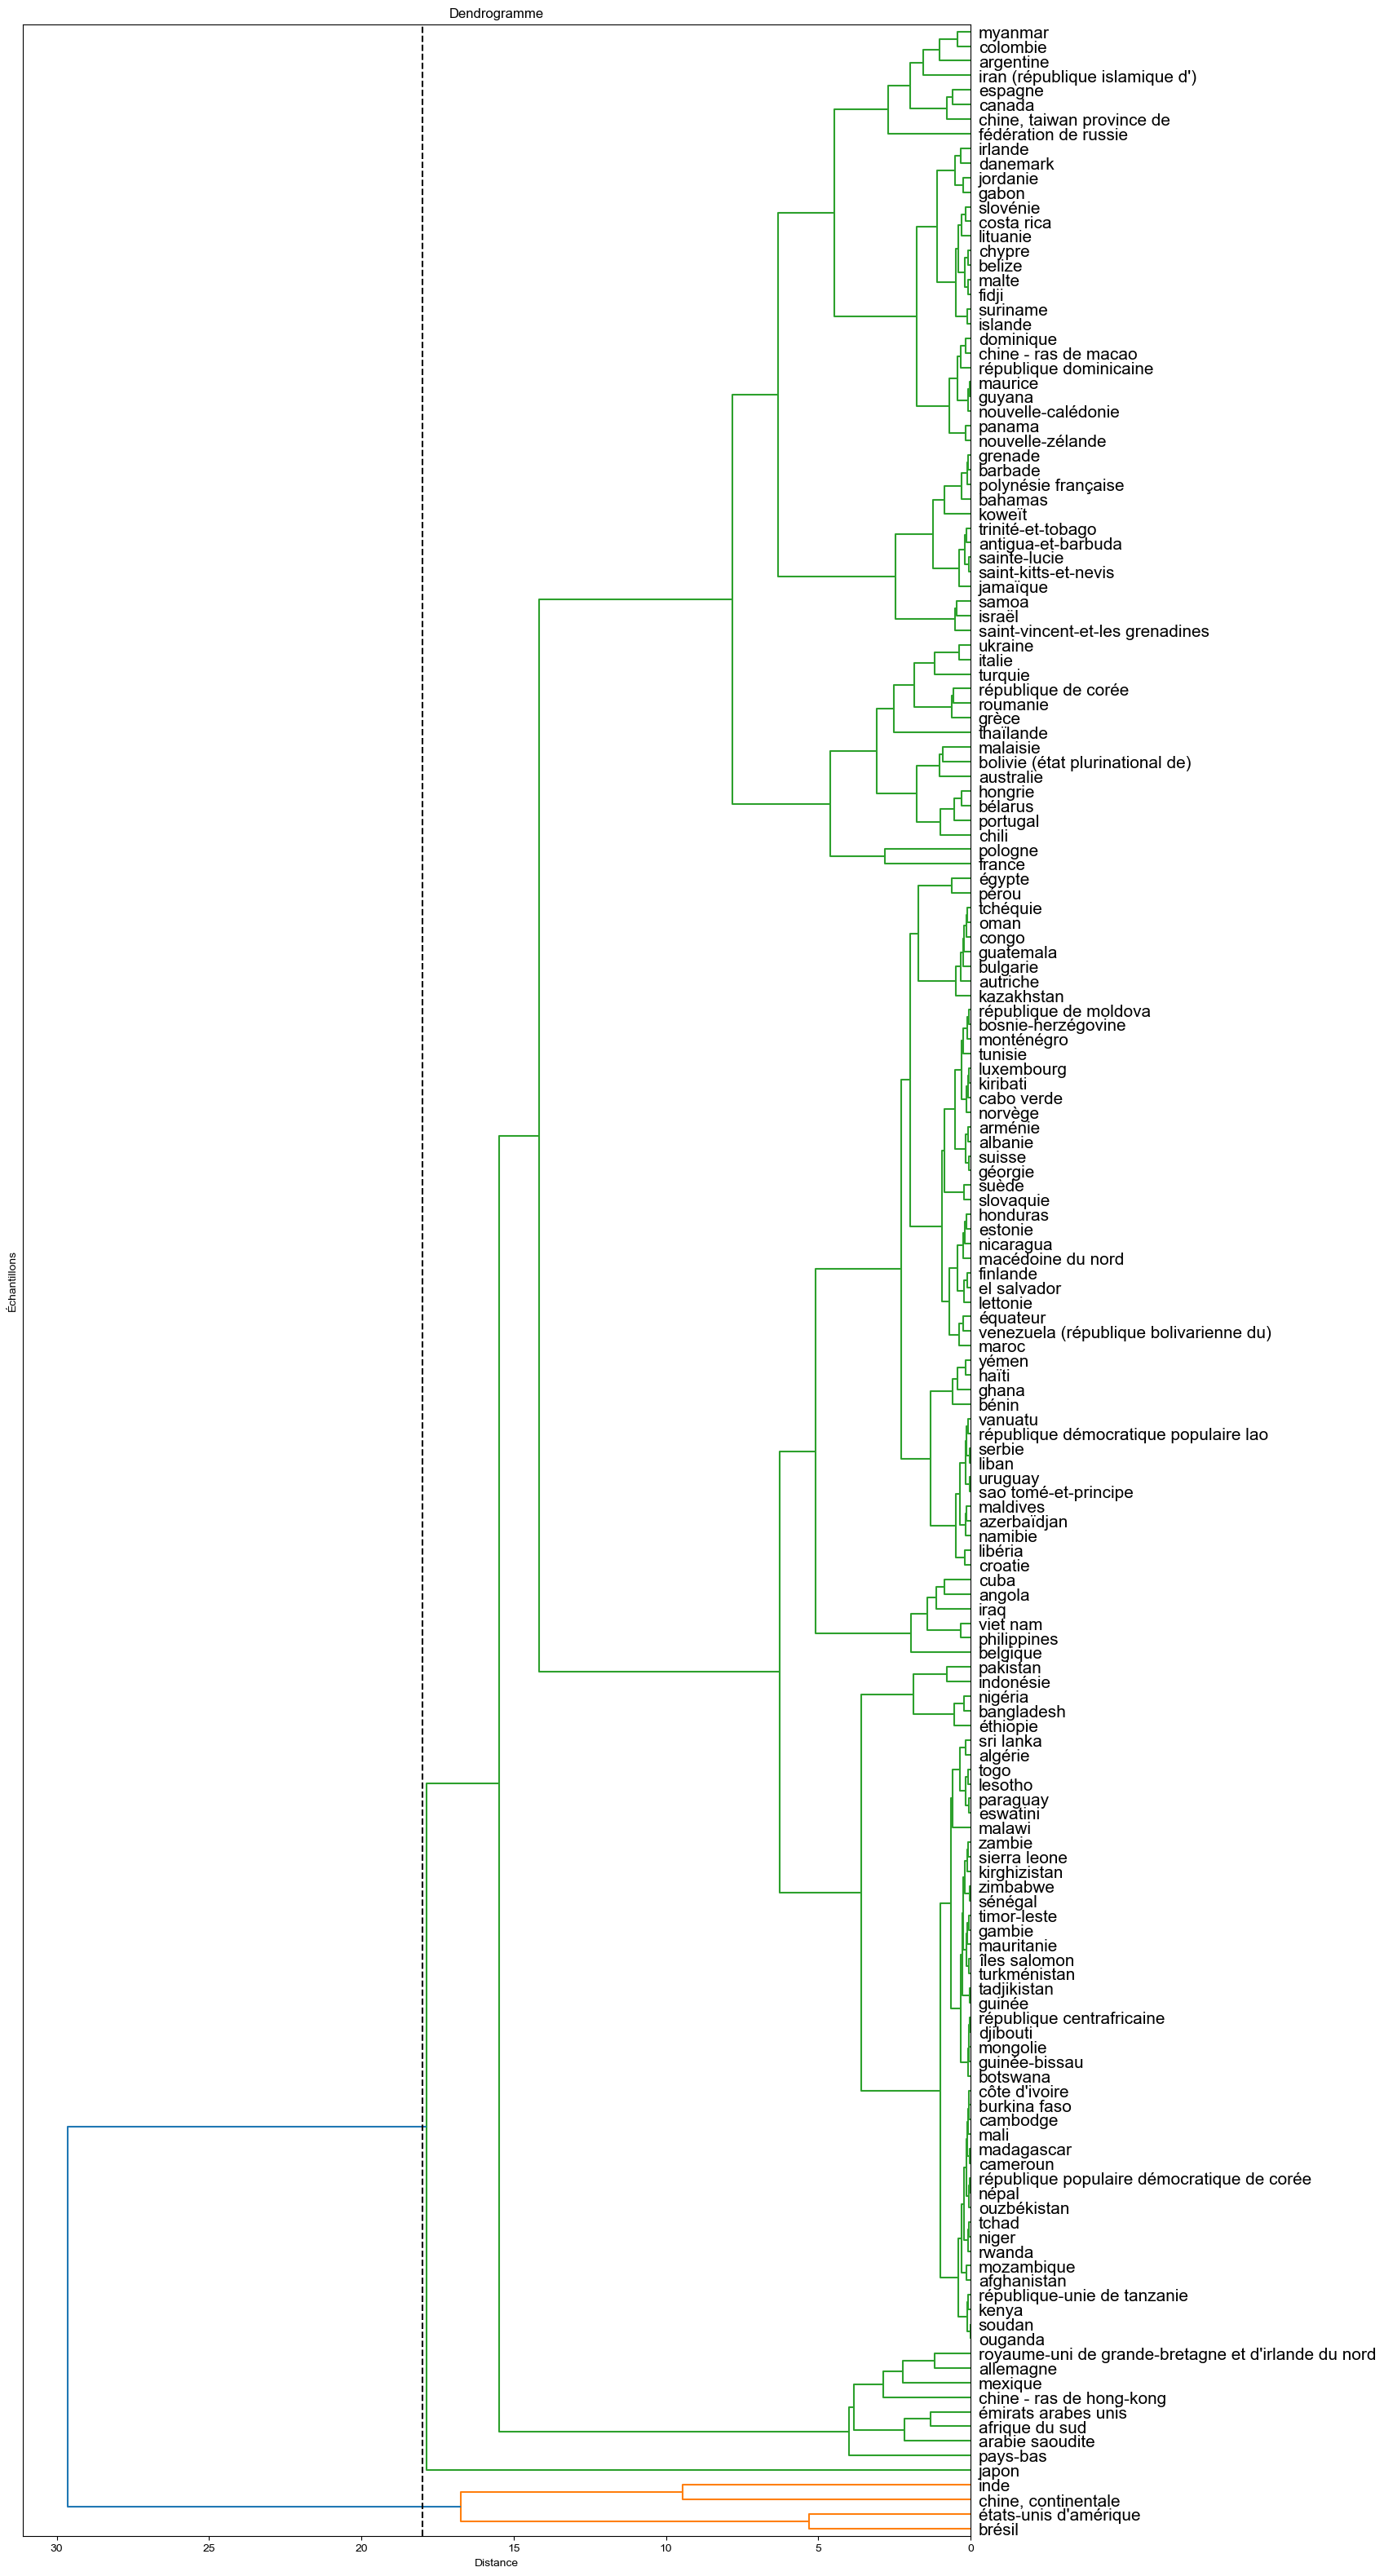

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(15, 40))

_ = dendrogram(Z, ax=ax, orientation='left', labels=data.index, leaf_font_size = 15)

plt.title("Dendrogramme")
plt.xlabel("Distance")
plt.ylabel("Échantillons")
sns.set_style("darkgrid")
plt.axvline(x = 18, color = "black", linestyle = "dashed")
plt.show()

#### 4.2.1 - Visualisation du cluster qui se détache des autres

In [15]:
# Réalisation du clustering hierarchique avec fcluster
cluster_dendrogram = fcluster(Z, t=18, criterion='distance')
# La valeur t=18 est un seuil utilisé pour couper le dendrogramme et former des clusters

nb_cluster = np.unique(cluster_dendrogram).size
print("Il y a", nb_cluster, "clusters.")

Il y a 2 clusters.


In [16]:
data["cluster_CAH"] = cluster_dendrogram
data

dispo_alim_(kg/personne/an)  dispo_interieur*1000t  \
pays                                                                        
afghanistan                                   1.53                   57.0   
afrique du sud                               35.69                 2118.0   
albanie                                      16.36                   47.0   
algérie                                       6.38                  277.0   
allemagne                                    19.47                 1739.0   
...                                            ...                    ...   
émirats arabes unis                          43.47                  412.0   
équateur                                     19.31                  341.0   
états-unis d'amérique                        55.68                18266.0   
éthiopie                                      0.13                   14.0   
îles salomon                                  4.45                    3.0   

                       exportations*1000t  importations*1000t  \
pays                                                            
afghanistan                           0.0                29.0   
afrique du sud                       63.0               514.0   
albanie                               0.0                38.0   
algérie                               0.0                 2.0   
allemagne                           646.0               842.0   
...                                   ...                 ...   
émirats arabes unis                  94.0               433.0   
équateur                              0.0                 0.0   
états-unis d'amérique              3692.0               123.0   
éthiopie                              0.0                 1.0   
îles salomon                          0.0                 6.0   

                       production*1000t  variation_stock*1000t   population  \
pays                                                                          
afghanistan                        28.0                    0.0   36296113.0   
afrique du sud                   1667.0                   -0.0   57009756.0   
albanie                            13.0                    4.0    2884169.0   
algérie                           275.0                    0.0   41389189.0   
allemagne                        1514.0                  -29.0   82658409.0   
...                                 ...                    ...          ...   
émirats arabes unis                48.0                  -26.0    9487203.0   
équateur                          340.0                   -1.0   16785361.0   
états-unis d'amérique           21914.0                   80.0  325084756.0   
éthiopie                           14.0                    0.0  106399924.0   
îles salomon                        0.0                    3.0     636039.0   

                       cluster_CAH  
pays                                
afghanistan                      2  
afrique du sud                   2  
albanie                          2  
algérie                          2  
allemagne                        2  
...                            ...  
émirats arabes unis              2  
équateur                         2  
états-unis d'amérique            1  
éthiopie                         2  
îles salomon                     2  

[172 rows x 8 columns]

In [17]:
list_pays_c1 = data[data["cluster_CAH"] == 1]
list_pays_c2 = data[data["cluster_CAH"] == 2]


pays_du_cluster = [list_pays_c1, list_pays_c2]

for i, pays_du_cluster in enumerate(pays_du_cluster, start=1):
    print("Cluster", i)
    for index in pays_du_cluster.index.tolist():
        print(index)
    print()

Cluster 1
brésil
chine, continentale
inde
états-unis d'amérique

Cluster 2
afghanistan
afrique du sud
albanie
algérie
allemagne
angola
antigua-et-barbuda
arabie saoudite
argentine
arménie
australie
autriche
azerbaïdjan
bahamas
bangladesh
barbade
belgique
belize
bolivie (état plurinational de)
bosnie-herzégovine
botswana
bulgarie
burkina faso
bélarus
bénin
cabo verde
cambodge
cameroun
canada
chili
chine - ras de hong-kong
chine - ras de macao
chine, taiwan province de
chypre
colombie
congo
costa rica
croatie
cuba
côte d'ivoire
danemark
djibouti
dominique
el salvador
espagne
estonie
eswatini
fidji
finlande
france
fédération de russie
gabon
gambie
ghana
grenade
grèce
guatemala
guinée
guinée-bissau
guyana
géorgie
haïti
honduras
hongrie
indonésie
iran (république islamique d')
iraq
irlande
islande
israël
italie
jamaïque
japon
jordanie
kazakhstan
kenya
kirghizistan
kiribati
koweït
lesotho
lettonie
liban
libéria
lituanie
luxembourg
macédoine du nord
madagascar
malaisie
malawi
maldives
mali
ma

In [18]:
pays_c1 = ["brésil", "chine, continentale", "inde","états-unis d'amérique"]
pays_visu = data.loc[pays_c1]

pays_visu

dispo_alim_(kg/personne/an)  dispo_interieur*1000t  \
pays                                                                        
brésil                                       48.03                 9982.0   
chine, continentale                          12.33                18161.0   
inde                                          2.22                 3661.0   
états-unis d'amérique                        55.68                18266.0   

                       exportations*1000t  importations*1000t  \
pays                                                            
brésil                             4223.0                 3.0   
chine, continentale                 576.0               452.0   
inde                                  4.0                 0.0   
états-unis d'amérique              3692.0               123.0   

                       production*1000t  variation_stock*1000t    population  \
pays                                                                           
brésil                          14201.0                    0.0  2.078338e+08   
chine, continentale             18236.0                  -50.0  1.421022e+09   
inde                             3545.0                 -119.0  1.338677e+09   
états-unis d'amérique           21914.0                   80.0  3.250848e+08   

                       cluster_CAH  
pays                                
brésil                           1  
chine, continentale              1  
inde                             1  
états-unis d'amérique            1

Ces pays présentent une forte population ainsi qu'une disponibilité alimentaire suffisante, excepté l'Inde. Ce dernier produit toute fois en quantité suffisante car il n'importe aucune viande de volaille et n'en exporte pas non plus. Le Brésil importe peu mais produit et exporte beaucoup ce qui signifie qu'il possède une quantité suffisante. Quant à la Chine Continentale et les États-Unis d'Amérique, ce sont de gros producteurs et importateurs mais aussi de gros exportateurs. Ces pays ce révèlent donc moins pertinents que les autres et donc ne nécessitent pas d'être pris en compte pour l'analyse.

In [19]:
pays_a_supprimer = ["brésil", "chine, continentale", "inde","états-unis d'amérique"]

data = data.drop(pays_a_supprimer)

In [20]:
data = data.drop("cluster_CAH", axis=1)

#### 4.2.2 - Réalisation d'un nouveau dendrogramme

In [21]:
data_scaled = scaler.fit_transform(data)

In [22]:
Z = linkage(data_scaled, method="ward", metric = "euclidean")

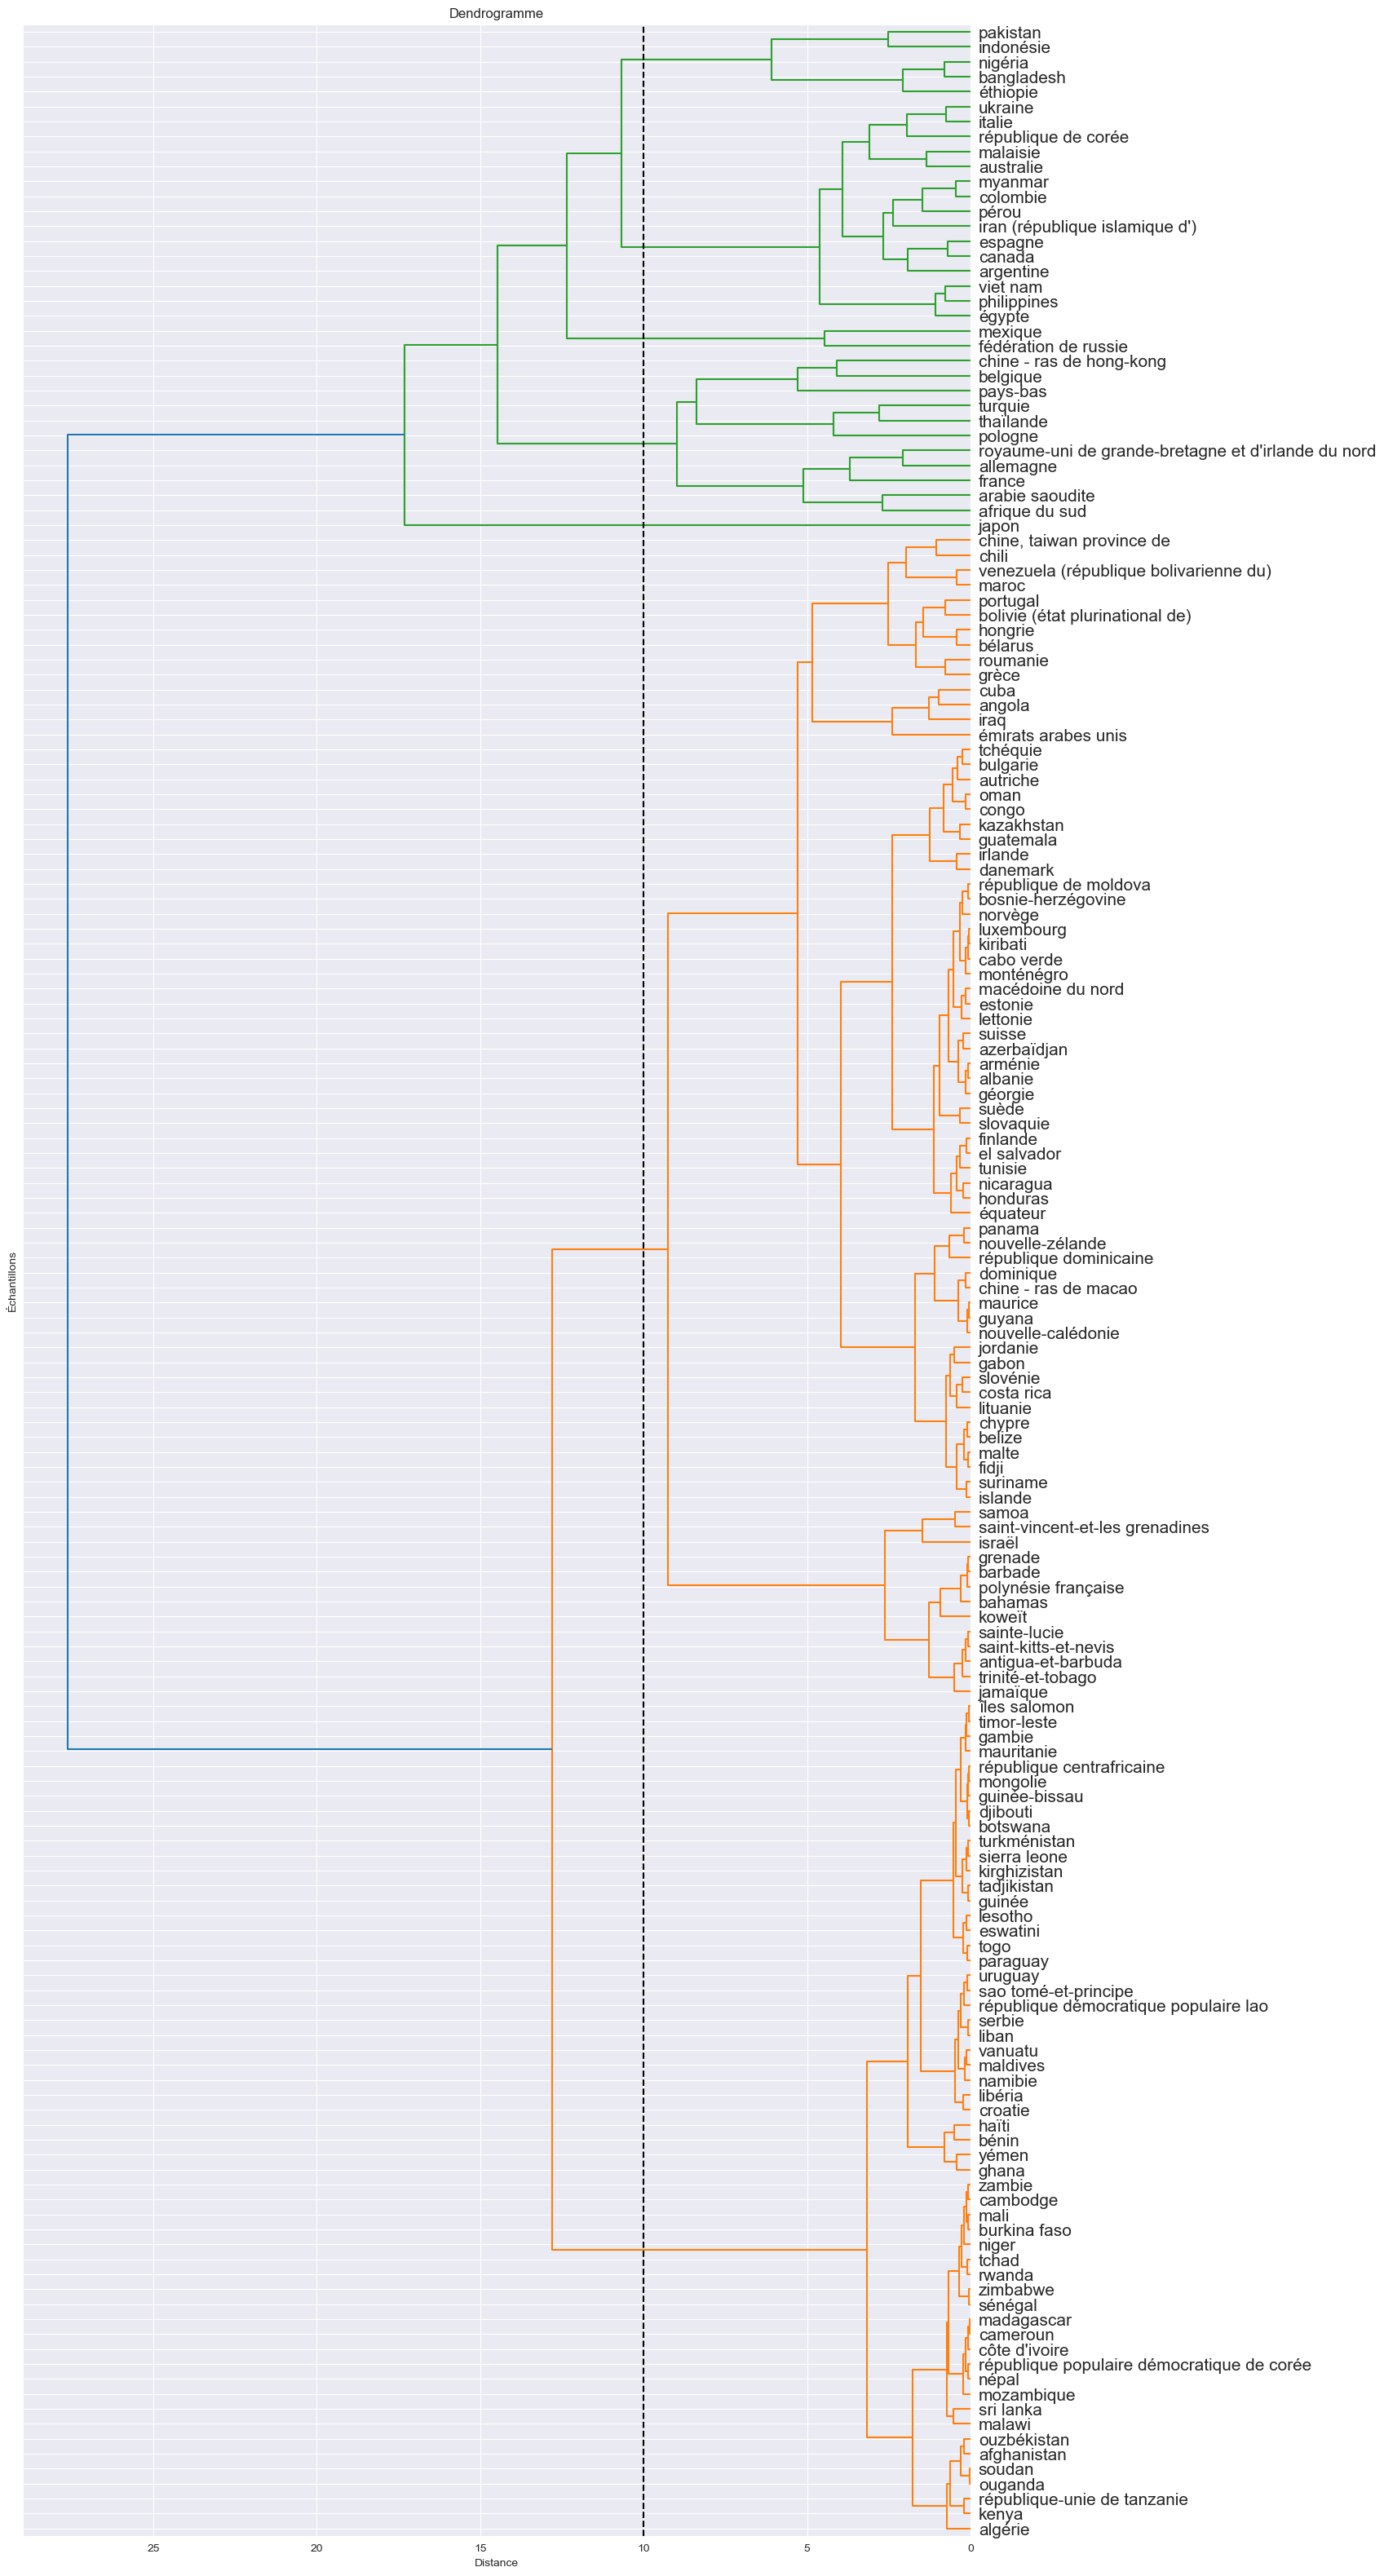

In [23]:
fig, ax = plt.subplots(1, 1, figsize=(15, 40))

_ = dendrogram(Z, ax=ax, orientation='left', labels=data.index, leaf_font_size = 15)

plt.title("Dendrogramme")
plt.xlabel("Distance")
plt.ylabel("Échantillons")
sns.set_style("darkgrid")
plt.axvline(x = 10, color = "black", linestyle = "dashed")
plt.show()

In [24]:
# Réalisation du clustering hierarchique avec fcluster
cluster_dendrogram = fcluster(Z, t=10, criterion='distance')
# La valeur t=10 est un seuil utilisé pour couper le dendrogramme et former des clusters

nb_cluster = np.unique(cluster_dendrogram).size
print("Il y a", nb_cluster, "clusters.")

Il y a 7 clusters.


In [25]:
data["cluster_CAH"] = cluster_dendrogram
data

dispo_alim_(kg/personne/an)  dispo_interieur*1000t  \
pays                                                                      
afghanistan                                 1.53                   57.0   
afrique du sud                             35.69                 2118.0   
albanie                                    16.36                   47.0   
algérie                                     6.38                  277.0   
allemagne                                  19.47                 1739.0   
...                                          ...                    ...   
égypte                                     12.96                 1250.0   
émirats arabes unis                        43.47                  412.0   
équateur                                   19.31                  341.0   
éthiopie                                    0.13                   14.0   
îles salomon                                4.45                    3.0   

                     exportations*1000t  importations*1000t  production*1000t  \
pays                                                                            
afghanistan                         0.0                29.0              28.0   
afrique du sud                     63.0               514.0            1667.0   
albanie                             0.0                38.0              13.0   
algérie                             0.0                 2.0             275.0   
allemagne                         646.0               842.0            1514.0   
...                                 ...                 ...               ...   
égypte                              1.0               110.0            1118.0   
émirats arabes unis                94.0               433.0              48.0   
équateur                            0.0                 0.0             340.0   
éthiopie                            0.0                 1.0              14.0   
îles salomon                        0.0                 6.0               0.0   

                     variation_stock*1000t   population  cluster_CAH  
pays                                                                  
afghanistan                            0.0   36296113.0            1  
afrique du sud                        -0.0   57009756.0            3  
albanie                                4.0    2884169.0            2  
algérie                                0.0   41389189.0            1  
allemagne                            -29.0   82658409.0            3  
...                                    ...          ...          ...  
égypte                               -23.0   96442591.0            5  
émirats arabes unis                  -26.0    9487203.0            2  
équateur                              -1.0   16785361.0            2  
éthiopie                               0.0  106399924.0            6  
îles salomon                           3.0     636039.0            1  

[168 rows x 8 columns]

In [26]:
cluster_dendrogram = data.groupby(["cluster_CAH"], as_index = False).agg({"mean"})
pd.set_option("display.float_format","{:.2f}".format)
cluster_dendrogram

dispo_alim_(kg/personne/an) dispo_interieur*1000t  \
                                   mean                  mean   
cluster_CAH                                                     
1                                  5.24                 56.54   
2                                 29.03                167.06   
3                                 27.61               1237.64   
4                                 31.75               4387.50   
5                                 26.61               1449.93   
6                                  3.14                814.20   
7                                 18.50               2415.00   

            exportations*1000t importations*1000t production*1000t  \
                          mean               mean             mean   
cluster_CAH                                                          
1                         0.89              16.52            42.36   
2                        18.13              58.19           138.72   
3                       596.91             479.64          1378.82   
4                        62.00             599.00          3846.50   
5                        78.80             108.73          1441.53   
6                         0.80               0.80           809.20   
7                        10.00            1069.00          2215.00   

            variation_stock*1000t   population  
                             mean         mean  
cluster_CAH                                     
1                            1.36  14947726.66  
2                           11.71   6839864.46  
3                           24.00  48033288.27  
4                           -3.50 135153703.00  
5                           21.20  56659364.07  
6                           -4.80 185903152.80  
7                          859.00 127502725.00

In [27]:
centroids_cah = data.groupby("cluster_CAH").mean().reset_index()
centroids_cah

cluster_CAH  dispo_alim_(kg/personne/an)  dispo_interieur*1000t  \
0            1                         5.24                  56.54   
1            2                        29.03                 167.06   
2            3                        27.61                1237.64   
3            4                        31.75                4387.50   
4            5                        26.61                1449.93   
5            6                         3.14                 814.20   
6            7                        18.50                2415.00   

   exportations*1000t  importations*1000t  production*1000t  \
0                0.89               16.52             42.36   
1               18.13               58.19            138.72   
2              596.91              479.64           1378.82   
3               62.00              599.00           3846.50   
4               78.80              108.73           1441.53   
5                0.80                0.80            809.20   
6               10.00             1069.00           2215.00   

   variation_stock*1000t   population  
0                   1.36  14947726.66  
1                  11.71   6839864.46  
2                  24.00  48033288.27  
3                  -3.50 135153703.00  
4                  21.20  56659364.07  
5                  -4.80 185903152.80  
6                 859.00 127502725.00

In [28]:
centroids_cah.set_index("cluster_CAH", inplace=True)
centroids_cah

dispo_alim_(kg/personne/an)  dispo_interieur*1000t  \
cluster_CAH                                                       
1                                   5.24                  56.54   
2                                  29.03                 167.06   
3                                  27.61                1237.64   
4                                  31.75                4387.50   
5                                  26.61                1449.93   
6                                   3.14                 814.20   
7                                  18.50                2415.00   

             exportations*1000t  importations*1000t  production*1000t  \
cluster_CAH                                                             
1                          0.89               16.52             42.36   
2                         18.13               58.19            138.72   
3                        596.91              479.64           1378.82   
4                         62.00              599.00           3846.50   
5                         78.80              108.73           1441.53   
6                          0.80                0.80            809.20   
7                         10.00             1069.00           2215.00   

             variation_stock*1000t   population  
cluster_CAH                                      
1                             1.36  14947726.66  
2                            11.71   6839864.46  
3                            24.00  48033288.27  
4                            -3.50 135153703.00  
5                            21.20  56659364.07  
6                            -4.80 185903152.80  
7                           859.00 127502725.00

#### 4.2.3 - Visualisation des clusters 

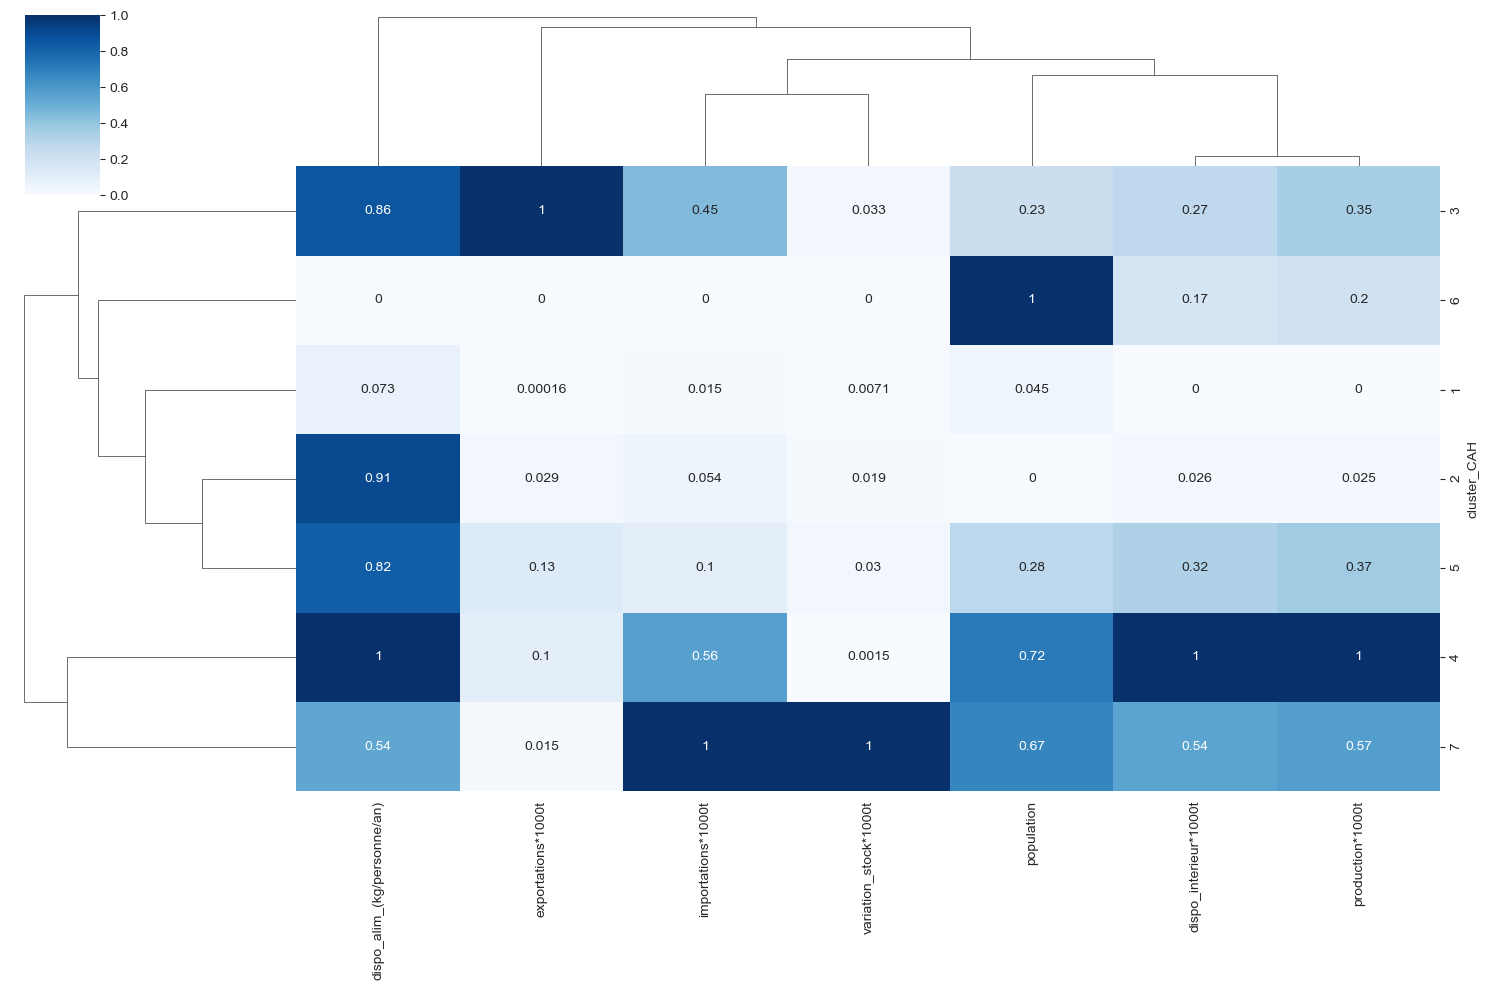

In [29]:
clustermap = sns.clustermap(centroids_cah, figsize = (15, 10), annot = True, standard_scale = 1, cmap = "Blues")
plt.show()

row_labels = clustermap.dendrogram_row.reordered_ind
col_labels = clustermap.dendrogram_col.reordered_ind
table_data = centroids_cah.iloc[row_labels, col_labels]

In [30]:
list_pays_c1 = data[data["cluster_CAH"] == 1]
list_pays_c2 = data[data["cluster_CAH"] == 2]
list_pays_c3 = data[data["cluster_CAH"] == 3]
list_pays_c4 = data[data["cluster_CAH"] == 4]
list_pays_c5 = data[data["cluster_CAH"] == 5]
list_pays_c6 = data[data["cluster_CAH"] == 6]
list_pays_c7 = data[data["cluster_CAH"] == 7]

pays_du_cluster = [list_pays_c1, list_pays_c2, list_pays_c3, list_pays_c4, list_pays_c5,list_pays_c6,list_pays_c7]

for i, pays_du_cluster in enumerate(pays_du_cluster, start=1):
    print("Cluster", i)
    for index in pays_du_cluster.index.tolist():
        print(index)
    print()

Cluster 1
afghanistan
algérie
botswana
burkina faso
bénin
cambodge
cameroun
croatie
côte d'ivoire
djibouti
eswatini
gambie
ghana
guinée
guinée-bissau
haïti
kenya
kirghizistan
lesotho
liban
libéria
madagascar
malawi
maldives
mali
mauritanie
mongolie
mozambique
namibie
niger
népal
ouganda
ouzbékistan
paraguay
rwanda
république centrafricaine
république démocratique populaire lao
république populaire démocratique de corée
république-unie de tanzanie
sao tomé-et-principe
serbie
sierra leone
soudan
sri lanka
sénégal
tadjikistan
tchad
timor-leste
togo
turkménistan
uruguay
vanuatu
yémen
zambie
zimbabwe
îles salomon

Cluster 2
albanie
angola
antigua-et-barbuda
arménie
autriche
azerbaïdjan
bahamas
barbade
belize
bolivie (état plurinational de)
bosnie-herzégovine
bulgarie
bélarus
cabo verde
chili
chine - ras de macao
chine, taiwan province de
chypre
congo
costa rica
cuba
danemark
dominique
el salvador
estonie
fidji
finlande
gabon
grenade
grèce
guatemala
guyana
géorgie
honduras
hongrie
iraq
irlan

Cluster 1 : Ces pays ne produisent pas et ne possèdent aucune disponibilité intérieure. De plus, ils exportent très peu et importent très peu également. Leur population est basse ainsi que leur disponibilité alimentaire.

Cluster 2 : Ces pays possèdent une population très faible avec une production, une disponibilité intérieure, une importation et une exportation faible également. Cependant, ils affichent une forte disponibilité alimentaire qui doit être suffisante pour leur population.

Cluster 3 : Pays qui exportent en grande quantité et qui importent en quantité modérée. Leur disponibilité alimentaire est forte mais leur disponibilité intérieure est faible ainsi que leur production. Ces pays ont donc besoin d'importation pour satisfaire les besoins de leur population.

Cluster 4 : Ces pays affichent une production, une disponibilité intérieure et alimentaire très forte. De plus, ils possèdent une population dense avec une importation assez forte et une exportation très faible. Ces pays sont donc en demande d'importation.

Cluster 5 : Ce cluster affiche une production, une disponibilité intérieure et une population assez faible. Cependant, la disponibilité alimentaire se révèle très forte face à une importation et exportation très faible. Les pays de ce cluster sont donc autosuffisants.

Cluster 6 : Ces pays disposent d'une forte population et d'une production et disponibilité interieure très faible. Aucune importation dans ce cluster malgré une disponibilité alimentaire absente. Ces pays sont donc moins intéressants que les autres.

Cluster 7 : Pays disposant d'une population assez forte. Mais aussi, une disponibilité intérieure et alimentaire et une production modérées avec une importation très forte face à une exportation très faible. Ce pays se révèle donc intéressant.

In [31]:
japon = ["japon"]
japon_visu = data.loc[japon]

japon_visu

dispo_alim_(kg/personne/an)  dispo_interieur*1000t  exportations*1000t  \
pays                                                                            
japon                        18.50                2415.00               10.00   

       importations*1000t  production*1000t  variation_stock*1000t  \
pays                                                                 
japon             1069.00           2215.00                 859.00   

        population  cluster_CAH  
pays                             
japon 127502725.00            7

Le Japon possède une forte importation et une production modérée. Cependant sa disponibilité alimentaire est modérée également et donc suffisante pour répondre aux besoins alimentaire de la population.

Après visualisation des résultats, je sélectionne les clusters 3 et 4 pour exporter les viandes de volailles.

#### 4.2.4 - Boîte à moustache

In [32]:
variable = ['dispo_alim_(kg/personne/an)', 'dispo_interieur*1000t',
       'exportations*1000t', 'importations*1000t', 'production*1000t',
       'variation_stock*1000t', 'population']

fig = make_subplots(cols = 2, rows = 4, subplot_titles = variable)

for i,var in enumerate(variable):
    fig.add_trace(go.Box(x = data['cluster_CAH'], y = data[var]), row = (i//2)+1, col = (i%2)+1)

fig.update_layout(width = 1000, height = 1200, showlegend = False)
fig.show()

In [33]:
df_cah = data
df_cah

dispo_alim_(kg/personne/an)  dispo_interieur*1000t  \
pays                                                                      
afghanistan                                 1.53                  57.00   
afrique du sud                             35.69                2118.00   
albanie                                    16.36                  47.00   
algérie                                     6.38                 277.00   
allemagne                                  19.47                1739.00   
...                                          ...                    ...   
égypte                                     12.96                1250.00   
émirats arabes unis                        43.47                 412.00   
équateur                                   19.31                 341.00   
éthiopie                                    0.13                  14.00   
îles salomon                                4.45                   3.00   

                     exportations*1000t  importations*1000t  production*1000t  \
pays                                                                            
afghanistan                        0.00               29.00             28.00   
afrique du sud                    63.00              514.00           1667.00   
albanie                            0.00               38.00             13.00   
algérie                            0.00                2.00            275.00   
allemagne                        646.00              842.00           1514.00   
...                                 ...                 ...               ...   
égypte                             1.00              110.00           1118.00   
émirats arabes unis               94.00              433.00             48.00   
équateur                           0.00                0.00            340.00   
éthiopie                           0.00                1.00             14.00   
îles salomon                       0.00                6.00              0.00   

                     variation_stock*1000t   population  cluster_CAH  
pays                                                                  
afghanistan                           0.00  36296113.00            1  
afrique du sud                       -0.00  57009756.00            3  
albanie                               4.00   2884169.00            2  
algérie                               0.00  41389189.00            1  
allemagne                           -29.00  82658409.00            3  
...                                    ...          ...          ...  
égypte                              -23.00  96442591.00            5  
émirats arabes unis                 -26.00   9487203.00            2  
équateur                             -1.00  16785361.00            2  
éthiopie                              0.00 106399924.00            6  
îles salomon                          3.00    636039.00            1  

[168 rows x 8 columns]

In [34]:
data = data.drop('cluster_CAH', axis=1)
data

dispo_alim_(kg/personne/an)  dispo_interieur*1000t  \
pays                                                                      
afghanistan                                 1.53                  57.00   
afrique du sud                             35.69                2118.00   
albanie                                    16.36                  47.00   
algérie                                     6.38                 277.00   
allemagne                                  19.47                1739.00   
...                                          ...                    ...   
égypte                                     12.96                1250.00   
émirats arabes unis                        43.47                 412.00   
équateur                                   19.31                 341.00   
éthiopie                                    0.13                  14.00   
îles salomon                                4.45                   3.00   

                     exportations*1000t  importations*1000t  production*1000t  \
pays                                                                            
afghanistan                        0.00               29.00             28.00   
afrique du sud                    63.00              514.00           1667.00   
albanie                            0.00               38.00             13.00   
algérie                            0.00                2.00            275.00   
allemagne                        646.00              842.00           1514.00   
...                                 ...                 ...               ...   
égypte                             1.00              110.00           1118.00   
émirats arabes unis               94.00              433.00             48.00   
équateur                           0.00                0.00            340.00   
éthiopie                           0.00                1.00             14.00   
îles salomon                       0.00                6.00              0.00   

                     variation_stock*1000t   population  
pays                                                     
afghanistan                           0.00  36296113.00  
afrique du sud                       -0.00  57009756.00  
albanie                               4.00   2884169.00  
algérie                               0.00  41389189.00  
allemagne                           -29.00  82658409.00  
...                                    ...          ...  
égypte                              -23.00  96442591.00  
émirats arabes unis                 -26.00   9487203.00  
équateur                             -1.00  16785361.00  
éthiopie                              0.00 106399924.00  
îles salomon                          3.00    636039.00  

[168 rows x 7 columns]

## 5 - Clustering avec l'algorithme du k-means

In [35]:
scaler = StandardScaler()

In [36]:
data_scaled_2 = scaler.fit_transform(data)

### 5.1 - Définir un nombre de cluster et instancier l'estimateur

In [37]:
kmeans = KMeans(n_clusters=10)

### 5.2 - L'entrainer et calculer son inertie

In [38]:
kmeans.fit(data_scaled_2)

KMeans(n_clusters=10)

In [39]:
kmeans.inertia_

204.15700456084934

### 5.3 - Utiliser la méthode du coude 

#### 5.3.1 - Définir une liste vide pour stocker les inerties

In [40]:
intertia = []

#### 5.3.2 - Définir la liste du nombre de clusters à tester

In [41]:
k_list = range(1, 11)
list(k_list)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

#### 5.3.3 - Pour chaque valeur de k, entrainer un k-means spécifique et stocker son inertie 

In [42]:
for i in k_list :
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(data_scaled_2) 
  intertia.append(kmeans.inertia_)

In [43]:
intertia

[1175.9999999999998,
 779.7740713367085,
 632.135398687024,
 528.963254396339,
 416.1143974655198,
 353.14677565947636,
 290.6417283232013,
 255.4456425643235,
 222.3911382336899,
 204.80288848077794]

#### 5.3.4 - Afficher le résultat

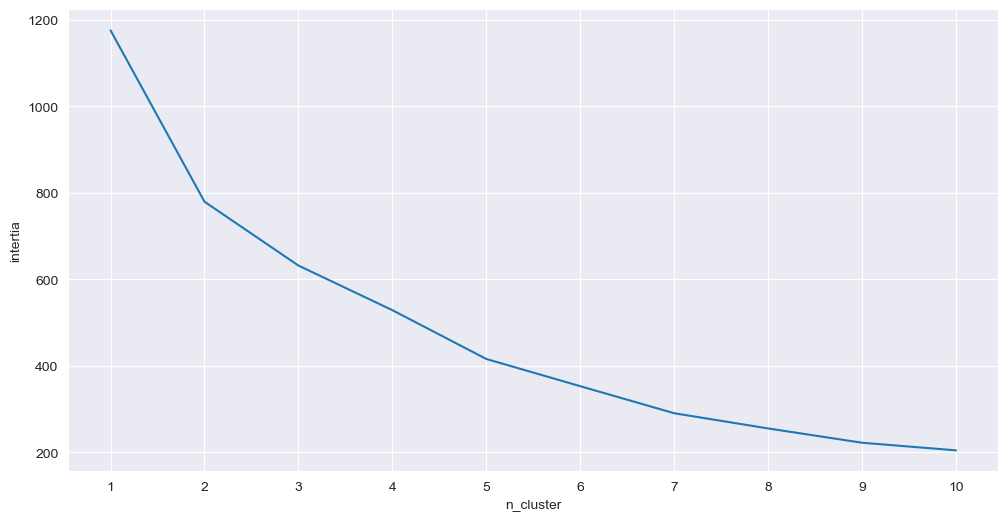

In [44]:
fig, ax = plt.subplots(1,1,figsize=(12,6))

ax.set_ylabel("intertia")
ax.set_xlabel("n_cluster")
plt.xticks(range(1,11))
ax = plt.plot(k_list, intertia)

### 5.4 - Clusters

#### 5.4.1 - Ré-entrainer un estimateur 

In [45]:
random_seed = 42 
kmeans = KMeans(n_clusters=8, random_state=random_seed)
kmeans.fit(data_scaled_2)


KMeans(random_state=42)

#### 5.4.2 - Visualiser les clusters

In [46]:
kmeans.labels_

array([0, 1, 0, 0, 1, 0, 2, 1, 3, 0, 3, 0, 0, 2, 4, 2, 5, 2, 2, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 3, 2, 1, 2, 2, 2, 3, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       3, 0, 0, 2, 0, 1, 7, 2, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 4, 3,
       0, 2, 2, 2, 3, 2, 6, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 3,
       0, 0, 0, 2, 0, 2, 0, 7, 0, 0, 0, 3, 0, 0, 0, 4, 0, 2, 2, 0, 0, 0,
       0, 4, 2, 0, 5, 3, 5, 2, 2, 3, 0, 1, 0, 0, 3, 0, 2, 0, 0, 0, 2, 2,
       2, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 5, 0, 0, 2, 0, 0,
       3, 3, 0, 0, 0, 3, 0, 0, 0, 3, 2, 0, 0, 0])

#### 5.4.3 - Définir les labels des clusters

In [47]:
labels = kmeans.labels_

#### 5.4.4 - Ajouter les clusters aux dataframes "data" 

In [48]:
data["cluster_k_means"] = labels
data

dispo_alim_(kg/personne/an)  dispo_interieur*1000t  \
pays                                                                      
afghanistan                                 1.53                  57.00   
afrique du sud                             35.69                2118.00   
albanie                                    16.36                  47.00   
algérie                                     6.38                 277.00   
allemagne                                  19.47                1739.00   
...                                          ...                    ...   
égypte                                     12.96                1250.00   
émirats arabes unis                        43.47                 412.00   
équateur                                   19.31                 341.00   
éthiopie                                    0.13                  14.00   
îles salomon                                4.45                   3.00   

                     exportations*1000t  importations*1000t  production*1000t  \
pays                                                                            
afghanistan                        0.00               29.00             28.00   
afrique du sud                    63.00              514.00           1667.00   
albanie                            0.00               38.00             13.00   
algérie                            0.00                2.00            275.00   
allemagne                        646.00              842.00           1514.00   
...                                 ...                 ...               ...   
égypte                             1.00              110.00           1118.00   
émirats arabes unis               94.00              433.00             48.00   
équateur                           0.00                0.00            340.00   
éthiopie                           0.00                1.00             14.00   
îles salomon                       0.00                6.00              0.00   

                     variation_stock*1000t   population  cluster_k_means  
pays                                                                      
afghanistan                           0.00  36296113.00                0  
afrique du sud                       -0.00  57009756.00                1  
albanie                               4.00   2884169.00                0  
algérie                               0.00  41389189.00                0  
allemagne                           -29.00  82658409.00                1  
...                                    ...          ...              ...  
égypte                              -23.00  96442591.00                3  
émirats arabes unis                 -26.00   9487203.00                2  
équateur                             -1.00  16785361.00                0  
éthiopie                              0.00 106399924.00                0  
îles salomon                          3.00    636039.00                0  

[168 rows x 8 columns]

### 5.5 - Visualisation graphique des clusters

#### 5.5.1 - Clustermap

In [49]:
cluster_kmeans = data.groupby(["cluster_k_means"], as_index = False).agg({"mean"})
pd.set_option("display.float_format","{:.2f}".format)
cluster_kmeans

dispo_alim_(kg/personne/an) dispo_interieur*1000t  \
                                       mean                  mean   
cluster_k_means                                                     
0                                     10.20                103.80   
1                                     34.48               1563.17   
2                                     38.32                156.14   
3                                     26.24               1463.94   
4                                      3.89               1014.25   
5                                     19.06                640.25   
6                                     18.50               2415.00   
7                                     31.75               4387.50   

                exportations*1000t importations*1000t production*1000t  \
                              mean               mean             mean   
cluster_k_means                                                          
0                             4.89              36.09            78.09   
1                           373.67             711.67          1230.83   
2                            24.02              50.21           141.52   
3                           100.69             102.12          1488.44   
4                             1.00               0.75          1008.00   
5                           973.75             250.75          1397.50   
6                            10.00            1069.00          2215.00   
7                            62.00             599.00          3846.50   

                variation_stock*1000t   population  
                                 mean         mean  
cluster_k_means                                     
0                                5.45  13943432.43  
1                                5.67  51940939.33  
2                               11.48   4291495.93  
3                               25.62  58187931.94  
4                               -6.00 205778960.00  
5                               34.50  33901021.25  
6                              859.00 127502725.00  
7                               -3.50 135153703.00

In [50]:
centroids_kmeans = data.groupby("cluster_k_means").mean().reset_index()
centroids_kmeans

cluster_k_means  dispo_alim_(kg/personne/an)  dispo_interieur*1000t  \
0                0                        10.20                 103.80   
1                1                        34.48                1563.17   
2                2                        38.32                 156.14   
3                3                        26.24                1463.94   
4                4                         3.89                1014.25   
5                5                        19.06                 640.25   
6                6                        18.50                2415.00   
7                7                        31.75                4387.50   

   exportations*1000t  importations*1000t  production*1000t  \
0                4.89               36.09             78.09   
1              373.67              711.67           1230.83   
2               24.02               50.21            141.52   
3              100.69              102.12           1488.44   
4                1.00                0.75           1008.00   
5              973.75              250.75           1397.50   
6               10.00             1069.00           2215.00   
7               62.00              599.00           3846.50   

   variation_stock*1000t   population  
0                   5.45  13943432.43  
1                   5.67  51940939.33  
2                  11.48   4291495.93  
3                  25.62  58187931.94  
4                  -6.00 205778960.00  
5                  34.50  33901021.25  
6                 859.00 127502725.00  
7                  -3.50 135153703.00

In [51]:
centroids_kmeans.set_index("cluster_k_means", inplace=True)
centroids_kmeans

dispo_alim_(kg/personne/an)  dispo_interieur*1000t  \
cluster_k_means                                                       
0                                      10.20                 103.80   
1                                      34.48                1563.17   
2                                      38.32                 156.14   
3                                      26.24                1463.94   
4                                       3.89                1014.25   
5                                      19.06                 640.25   
6                                      18.50                2415.00   
7                                      31.75                4387.50   

                 exportations*1000t  importations*1000t  production*1000t  \
cluster_k_means                                                             
0                              4.89               36.09             78.09   
1                            373.67              711.67           1230.83   
2                             24.02               50.21            141.52   
3                            100.69              102.12           1488.44   
4                              1.00                0.75           1008.00   
5                            973.75              250.75           1397.50   
6                             10.00             1069.00           2215.00   
7                             62.00              599.00           3846.50   

                 variation_stock*1000t   population  
cluster_k_means                                      
0                                 5.45  13943432.43  
1                                 5.67  51940939.33  
2                                11.48   4291495.93  
3                                25.62  58187931.94  
4                                -6.00 205778960.00  
5                                34.50  33901021.25  
6                               859.00 127502725.00  
7                                -3.50 135153703.00

In [52]:
clustermap2 = sns.clustermap(centroids_kmeans, figsize = (15, 10), annot = True, standard_scale = 1, cmap = "Blues")
plt.show()

row_labels = clustermap.dendrogram_row.reordered_ind
col_labels = clustermap.dendrogram_col.reordered_ind
table_data = centroids_kmeans.iloc[row_labels, col_labels]

In [53]:
list_pays_c0 = data[data["cluster_k_means"] == 0]
list_pays_c1 = data[data["cluster_k_means"] == 1]
list_pays_c2 = data[data["cluster_k_means"] == 2]
list_pays_c3 = data[data["cluster_k_means"] == 3]
list_pays_c4 = data[data["cluster_k_means"] == 4]
list_pays_c5 = data[data["cluster_k_means"] == 5]
list_pays_c6 = data[data["cluster_k_means"] == 6]
list_pays_c7 = data[data["cluster_k_means"] == 7]

pays_du_cluster = [list_pays_c0, list_pays_c1, list_pays_c2, list_pays_c3, 
                   list_pays_c4,list_pays_c5,list_pays_c6,list_pays_c7]

for i, pays_du_cluster in enumerate(pays_du_cluster, start=0):
    print("Cluster", i)
    for index in pays_du_cluster.index.tolist():
        print(index)
    print()

Cluster 0
afghanistan
albanie
algérie
angola
arménie
autriche
azerbaïdjan
bosnie-herzégovine
botswana
bulgarie
burkina faso
bénin
cabo verde
cambodge
cameroun
congo
croatie
côte d'ivoire
djibouti
el salvador
estonie
eswatini
finlande
gambie
ghana
grèce
guatemala
guinée
guinée-bissau
géorgie
haïti
honduras
iraq
kazakhstan
kenya
kirghizistan
kiribati
lesotho
lettonie
liban
libéria
luxembourg
macédoine du nord
madagascar
malawi
maldives
mali
maroc
mauritanie
mongolie
monténégro
mozambique
namibie
nicaragua
niger
norvège
népal
oman
ouganda
ouzbékistan
paraguay
roumanie
rwanda
république centrafricaine
république de moldova
république démocratique populaire lao
république populaire démocratique de corée
république-unie de tanzanie
sao tomé-et-principe
serbie
sierra leone
slovaquie
soudan
sri lanka
suisse
suède
sénégal
tadjikistan
tchad
tchéquie
timor-leste
togo
tunisie
turkménistan
uruguay
vanuatu
venezuela (république bolivarienne du)
yémen
zambie
zimbabwe
équateur
éthiopie
îles salomon

C

Cluster 0 : Tous leurs indicateurs sont faibles voire nuls.

Cluster 1 : Ces pays présentent une faible population, disponibilité intérieure, production et exportation. Cependant, ils révèlent une forte disponibilité alimentaire et importation. Ils ont donc besoin d'importatation pour réponder aux besoins de leur population.

Cluster 2 : Tous leurs indicateurs sont faibles voire nuls à l'exception de leur disponibilité alimentaire qui est très forte.

Cluster 3 : Tous leurs indicateurs sont assez faibles, hormis pour la disponibilité alimentaire modérée qui répond donc à leurs besoins.

Cluster 4 : Tous leurs indicateurs sont très faibles voire nuls à l'exception de la population qui est très forte. Malgré leur besoin alimentaire, ces pays ce révèlent moins intéressants que les autres.

Cluster 5 : Leurs indicateurs sont faibles hors mis pour la disponibilité alimentaire qui est modérée et leur exportation qui est très forte. Ces pays sont donc autosuffisants.

Cluster 6 : Ce cluster est constitué uniquement du Japon qui est un pays autosuffisant (constat effectué lors de la CAH).

Cluster 7 : Ces pays présentent une forte population et disponibilité alimentaire. Leur importation est modérée face à une disponibilité intérieure et une production très forte. Ils exportent très peu ce qui signifie que ces pays ont besoin d'importation malgré leurs indicateurs assez forts.

Après visualisation des résultats, je sélectionne les clusters 1 et 7 pour effectuer la suite de mon analyse et exporter les viandes de volaille. 

#### 5.5.2 - Boîte à moustache

In [54]:
variable = ['dispo_alim_(kg/personne/an)', 'dispo_interieur*1000t',
       'exportations*1000t', 'importations*1000t', 'production*1000t',
       'variation_stock*1000t', 'population']

fig = make_subplots(cols = 2, rows = 4, subplot_titles = variable)

for i,var in enumerate(variable):
    fig.add_trace(go.Box(x = data['cluster_k_means'], y = data[var]), row = (i//2)+1, col = (i%2)+1)

fig.update_layout(width = 1000, height = 1200, showlegend = False)
fig.show()

### 5.6 - Analyse des centroïdes

In [55]:
kmeans.labels_

array([0, 1, 0, 0, 1, 0, 2, 1, 3, 0, 3, 0, 0, 2, 4, 2, 5, 2, 2, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 3, 2, 1, 2, 2, 2, 3, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       3, 0, 0, 2, 0, 1, 7, 2, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 4, 3,
       0, 2, 2, 2, 3, 2, 6, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 3,
       0, 0, 0, 2, 0, 2, 0, 7, 0, 0, 0, 3, 0, 0, 0, 4, 0, 2, 2, 0, 0, 0,
       0, 4, 2, 0, 5, 3, 5, 2, 2, 3, 0, 1, 0, 0, 3, 0, 2, 0, 0, 0, 2, 2,
       2, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 5, 0, 0, 2, 0, 0,
       3, 3, 0, 0, 0, 3, 0, 0, 0, 3, 2, 0, 0, 0])

In [56]:
centroids = kmeans.cluster_centers_
centroids

array([[-0.62988961, -0.41146041, -0.28275486, -0.27589863, -0.43302845,
        -0.1187516 , -0.26089881],
       [ 0.93206689,  1.63132491,  1.77138215,  3.37392265,  1.21720779,
        -0.11585881,  0.69976306],
       [ 1.17903827, -0.33818637, -0.17618996, -0.19957075, -0.34221294,
        -0.03771216, -0.50492134],
       [ 0.40213077,  1.49242679,  0.25084026,  0.08087664,  1.58598569,
         0.15261015,  0.857701  ],
       [-1.03584603,  0.86296722, -0.30443662, -0.46680132,  0.89820671,
        -0.27279264,  4.58913197],
       [-0.06003872,  0.33945283,  5.11395168,  0.88382251,  1.45580247,
         0.27199196,  0.24367363],
       [-0.09590571,  2.8236966 , -0.25430504,  5.30441431,  2.62610936,
        11.36273038,  2.61013385],
       [ 0.75653845,  5.58474512,  0.03534409,  2.76524151,  4.96171266,
        -0.23916396,  2.80356767]])

In [57]:
centroids_kmeans

dispo_alim_(kg/personne/an)  dispo_interieur*1000t  \
cluster_k_means                                                       
0                                      10.20                 103.80   
1                                      34.48                1563.17   
2                                      38.32                 156.14   
3                                      26.24                1463.94   
4                                       3.89                1014.25   
5                                      19.06                 640.25   
6                                      18.50                2415.00   
7                                      31.75                4387.50   

                 exportations*1000t  importations*1000t  production*1000t  \
cluster_k_means                                                             
0                              4.89               36.09             78.09   
1                            373.67              711.67           1230.83   
2                             24.02               50.21            141.52   
3                            100.69              102.12           1488.44   
4                              1.00                0.75           1008.00   
5                            973.75              250.75           1397.50   
6                             10.00             1069.00           2215.00   
7                             62.00              599.00           3846.50   

                 variation_stock*1000t   population  
cluster_k_means                                      
0                                 5.45  13943432.43  
1                                 5.67  51940939.33  
2                                11.48   4291495.93  
3                                25.62  58187931.94  
4                                -6.00 205778960.00  
5                                34.50  33901021.25  
6                               859.00 127502725.00  
7                                -3.50 135153703.00

In [58]:
pays = data.index.values
df_data_scaled = pd.DataFrame(data_scaled_2, index = pays, columns = ['dispo_alim_(kg/personne/an)', 'dispo_interieur*1000t',
       'exportations*1000t', 'importations*1000t', 'production*1000t','variation_stock*1000t', 'population'])

In [59]:
cendroids_scale = scaler.fit_transform(centroids)
cendroids_proj = pd.DataFrame(centroids, index = ["cluster 0 ","cluster 1","cluster 2","cluster 3","cluster 4",
                                                  "cluster 5","cluster 6","cluster 7"], columns = ['dispo_alim_(kg/personne/an)', 'dispo_interieur*1000t',
       'exportations*1000t', 'importations*1000t', 'production*1000t','variation_stock*1000t', 'population'])

In [60]:
X = data[["dispo_interieur*1000t", "exportations*1000t", "importations*1000t", "variation_stock*1000t"]]
labels_original = data["cluster_k_means"].values
#Compute the centroids based on the provided clusters in the dataframe
centroids_original = X.groupby(data["cluster_k_means"]).mean().values

pca = PCA(n_components=4)
X_pca = pca.fit_transform(X)

#Transform the computed centroids for visualization
centroids_pca = pca.transform(centroids_original)

#Plotting
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_original, cmap="plasma", label="Data Points")
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], marker="x", s=200, linewidths=3, color="red", label="Centroids")

plt.xlim(-600, 4600)
plt.ylim(-500, 1500)
plt.xlabel("Composante principale 1")
plt.ylabel("Composante principale 2")
plt.title("Centroïdes des classes - k-means")

#Handling legend

legend_labels_original = list(set(labels_original))
legend_labels_original.sort()
legend_handles_original = [plt.Line2D([0], [0], marker='o', color='w', label=f"Cluster {label}", markerfacecolor=scatter.to_rgba(label)) for label in legend_labels_original]
plt.legend(handles=legend_handles_original)

plt.show()

## 6 - Comparaison des pays entre les clusters retenus (CAH et k-means)

### 6.1 - Pays cluster CAH 

In [61]:
df_cah

dispo_alim_(kg/personne/an)  dispo_interieur*1000t  \
pays                                                                      
afghanistan                                 1.53                  57.00   
afrique du sud                             35.69                2118.00   
albanie                                    16.36                  47.00   
algérie                                     6.38                 277.00   
allemagne                                  19.47                1739.00   
...                                          ...                    ...   
égypte                                     12.96                1250.00   
émirats arabes unis                        43.47                 412.00   
équateur                                   19.31                 341.00   
éthiopie                                    0.13                  14.00   
îles salomon                                4.45                   3.00   

                     exportations*1000t  importations*1000t  production*1000t  \
pays                                                                            
afghanistan                        0.00               29.00             28.00   
afrique du sud                    63.00              514.00           1667.00   
albanie                            0.00               38.00             13.00   
algérie                            0.00                2.00            275.00   
allemagne                        646.00              842.00           1514.00   
...                                 ...                 ...               ...   
égypte                             1.00              110.00           1118.00   
émirats arabes unis               94.00              433.00             48.00   
équateur                           0.00                0.00            340.00   
éthiopie                           0.00                1.00             14.00   
îles salomon                       0.00                6.00              0.00   

                     variation_stock*1000t   population  cluster_CAH  
pays                                                                  
afghanistan                           0.00  36296113.00            1  
afrique du sud                       -0.00  57009756.00            3  
albanie                               4.00   2884169.00            2  
algérie                               0.00  41389189.00            1  
allemagne                           -29.00  82658409.00            3  
...                                    ...          ...          ...  
égypte                              -23.00  96442591.00            5  
émirats arabes unis                 -26.00   9487203.00            2  
équateur                             -1.00  16785361.00            2  
éthiopie                              0.00 106399924.00            6  
îles salomon                          3.00    636039.00            1  

[168 rows x 8 columns]

In [62]:
clusters_a_garder = [3, 4]
df_filtre = df_cah[df_cah['cluster_CAH'].isin(clusters_a_garder)]
df_filtre

dispo_alim_(kg/personne/an)  \
pays                                                                              
afrique du sud                                                            35.69   
allemagne                                                                 19.47   
arabie saoudite                                                           43.36   
belgique                                                                  12.65   
chine - ras de hong-kong                                                  53.51   
france                                                                    22.90   
fédération de russie                                                      30.98   
mexique                                                                   32.52   
pays-bas                                                                  20.33   
pologne                                                                   30.30   
royaume-uni de grande-bretagne et d'irlande du ...                        31.94   
thaïlande                                                                 12.95   
turquie                                                                   20.64   

                                                    dispo_interieur*1000t  \
pays                                                                        
afrique du sud                                                    2118.00   
allemagne                                                         1739.00   
arabie saoudite                                                   1435.00   
belgique                                                           152.00   
chine - ras de hong-kong                                           280.00   
france                                                            1573.00   
fédération de russie                                              4556.00   
mexique                                                           4219.00   
pays-bas                                                           372.00   
pologne                                                           1156.00   
royaume-uni de grande-bretagne et d'irlande du ...                2234.00   
thaïlande                                                          881.00   
turquie                                                           1674.00   

                                                    exportations*1000t  \
pays                                                                     
afrique du sud                                                   63.00   
allemagne                                                       646.00   
arabie saoudite                                                  10.00   
belgique                                                        656.00   
chine - ras de hong-kong                                        663.00   
france                                                          501.00   
fédération de russie                                            115.00   
mexique                                                           9.00   
pays-bas                                                       1418.00   
pologne                                                        1025.00   
royaume-uni de grande-bretagne et d'irlande du ...              359.00   
thaïlande                                                       796.00   
turquie                                                         429.00   

                                                    importations*1000t  \
pays                                                                     
afrique du sud                                                  514.00   
allemagne                                                       842.00   
arabie saoudite                                                 722.00   
belgique                                                        338.00   
chine - ras de hong-kong                                        907.00   
france               

In [63]:
df_filtre.index

Index(['afrique du sud', 'allemagne', 'arabie saoudite', 'belgique',
       'chine - ras de hong-kong', 'france', 'fédération de russie', 'mexique',
       'pays-bas', 'pologne',
       'royaume-uni de grande-bretagne et d'irlande du nord', 'thaïlande',
       'turquie'],
      dtype='object', name='pays')

### 6.2 - Pays cluster k-means

In [64]:
clusters_a_conserver = [1, 7]
data_filtre = data[data['cluster_k_means'].isin(clusters_a_conserver)]
data_filtre

dispo_alim_(kg/personne/an)  \
pays                                                                              
afrique du sud                                                            35.69   
allemagne                                                                 19.47   
arabie saoudite                                                           43.36   
chine - ras de hong-kong                                                  53.51   
france                                                                    22.90   
fédération de russie                                                      30.98   
mexique                                                                   32.52   
royaume-uni de grande-bretagne et d'irlande du ...                        31.94   

                                                    dispo_interieur*1000t  \
pays                                                                        
afrique du sud                                                    2118.00   
allemagne                                                         1739.00   
arabie saoudite                                                   1435.00   
chine - ras de hong-kong                                           280.00   
france                                                            1573.00   
fédération de russie                                              4556.00   
mexique                                                           4219.00   
royaume-uni de grande-bretagne et d'irlande du ...                2234.00   

                                                    exportations*1000t  \
pays                                                                     
afrique du sud                                                   63.00   
allemagne                                                       646.00   
arabie saoudite                                                  10.00   
chine - ras de hong-kong                                        663.00   
france                                                          501.00   
fédération de russie                                            115.00   
mexique                                                           9.00   
royaume-uni de grande-bretagne et d'irlande du ...              359.00   

                                                    importations*1000t  \
pays                                                                     
afrique du sud                                                  514.00   
allemagne                                                       842.00   
arabie saoudite                                                 722.00   
chine - ras de hong-kong                                        907.00   
france                                                          506.00   
fédération de russie                                            226.00   
mexique                                                         972.00   
royaume-uni de grande-bretagne et d'irlande du ...              779.00   

                                                    production*1000t  \
pays                                                                   
afrique du sud                                               1667.00   
allemagne                                                    1514.00   
arabie saoudite                                               616.00   
chine - ras de hong-kong                                       24.00   
france                                                       1750.00   
fédération de russie                                         4444.00   
mexique                                                      3249.00   
royaume-uni de grande-bretagne et d'irlande du ...           1814.00   

                                                    variation_stock*1000t  \
pays                                                                        
afrique du sud                                                      -0.00   
allemagne       

In [65]:
data_filtre.index

Index(['afrique du sud', 'allemagne', 'arabie saoudite',
       'chine - ras de hong-kong', 'france', 'fédération de russie', 'mexique',
       'royaume-uni de grande-bretagne et d'irlande du nord'],
      dtype='object', name='pays')

### 6.3 - Comparaison des pays présents dans les clusters CAH et k-means

In [66]:
df_filtre.index

Index(['afrique du sud', 'allemagne', 'arabie saoudite', 'belgique',
       'chine - ras de hong-kong', 'france', 'fédération de russie', 'mexique',
       'pays-bas', 'pologne',
       'royaume-uni de grande-bretagne et d'irlande du nord', 'thaïlande',
       'turquie'],
      dtype='object', name='pays')

In [67]:
data_filtre.index

Index(['afrique du sud', 'allemagne', 'arabie saoudite',
       'chine - ras de hong-kong', 'france', 'fédération de russie', 'mexique',
       'royaume-uni de grande-bretagne et d'irlande du nord'],
      dtype='object', name='pays')

### 6.4 - Les 7 pays restants après les différentes analyses 

- Afrique du sud 
- Allemagne 
- Arabie Saoudite
- Chine - RAS de Hong-Kong
- Fédération de Russie
- Mexique 
- Royaume-Uni de grande bretagne et d'Irlande du Nord

In [68]:
pays_selectionne = {
    'Pays': ["Afrique du Sud", "Allemagne", "Arabie saoudite", "Hong-Kong", "Russie", "Mexique", "Royaume-Uni"],
    'Couleur': ["red", "blue", "green", "purple", "orange", "pink", "brown"],
    'Latitude': [-30.5595, 51.1657, 23.8859, 22.3964, 55.7558, 19.4326, 51.5099],
    'Longitude': [22.9375, 10.4515, 45.0792, 114.1095, 37.6176, -99.1332, -0.1180]
}

df = pd.DataFrame(pays_selectionne)


fig = px.scatter_geo(
    df,
    lon='Longitude',
    lat='Latitude',
    text='Pays',
    color='Couleur',  
    title='Représentation cartographique des pays sélectionnés',
    projection='equirectangular'
)

fig.update_traces(marker=dict(size=12), showlegend=False)


fig.update_geos(showcoastlines=True)  
fig.show()


Aux vues de la représentation cartographique, je désigne le Royaume-Uni ou l'Allemagne afin d'exporter les viandes de volailles. En effet, cela permettrait de limiter les coups d'exportations et d'adopter une posture écoresponsable car ces pays sont les plus proche voisins de la France.